## Analisis Peramalan Penjualan Peralatan Laboratorium Menggunakan Metode ARIMA

### Kelompok 08 Kelas ITS05
<ul>
    <li> Indrianto Kuseni </li>
    <li> Lafnidita F </li>
    <li> Husni Mubarok </li>
</ul>

### 1. Business Understanding



#### Identifikasi Permasalahan Bisnis
<p>
    Permasalahan bisnis yang dapat diidentifikasi adalah bagimana membangun sebuah sistem yang dapat menganalisa peramalan penjualan produk peralatan kesehatan untuk setiap kota di Bali dan sekitarnya, sehingga rantai pasok (supply chain) dapat diperkirakan dan terencana dengan baik.
</p>

#### Asumsi, Kebutuhan, dan Limitasi
<p>
    Analisis dan pembuatan sistem/aplikasi ini memerlukan data histori setiap transaksi yang terjadi untuk setiap kota dan kategori barang/alkes yang terjual. Berdasarkan data histori tersebut dapat dipelajari polanya berdasarkan urutan waktu (time series), sehingga trendnya dapat dipelajari dan  dijadikan dasar untuk prediksi kebutuhan di waktu yang akan datang.   
</p>

### 2. Data Understanding dan Data Cleansing

In [1]:
# import librari yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
from math import sqrt
import ipywidgets as widgets

In [2]:
# load data 
dts=pd.read_csv('detail_penjualan_4.csv', header=0,parse_dates=True, index_col='tgl_jual')

#### Cek lima data awal

In [3]:
# cek lima data awal
dts=dts.copy()
dts.head(5)

,id,no_faktur,idbarang,sn,qtt,hrg_jual,pot_onf,pot_off,hrg_beli,nama_barang,satuan,idkategori,nama_kategori,merek,nama_merek,idcustomer,nama_customer,alamat,kota
tgl_jual,,,,,,,,,,,,,,,,,,,
2016-01-04,4114,5166,61008,NaN,1,1735000.0,0.0,0.0,1400000,LIOFILCHEM Brain Heart Infusion Broth 500gram,Botol,30,Mikrobiologi,187,LIOFILCHEM,28,Lab Sano,Jl. Buana Raya. Padangsambian. Denpasar Bar.. ...,DENPASAR
2016-01-04,4115,5312,610040,NaN,1,1245000.0,0.0,186750.0,954000,LIOFILCHEM Plate Count Agar 500gram,Botol,30,Mikrobiologi,187,LIOFILCHEM,29,Lab Hidro,Jl. Raya Abianbase. Kapal. Mengwi - Badung,Badung
2016-01-04,4116,5312,610028,NaN,1,1190000.0,0.0,178500.0,0,LIOFILCHEM-MacConkey Agar 500gram,Botol,30,Mikrobiologi,187,LIOFILCHEM,29,Lab Hidro,Jl. Raya Abianbase. Kapal. Mengwi - Badung,Badung
2016-01-04,4117,5312,611202,NaN,1,1400000.0,0.0,210000.0,795000,LIOFILCHEM Lactose Broth 500gram,Botol,30,Mikrobiologi,187,LIOFILCHEM,29,Lab Hidro,Jl. Raya Abianbase. Kapal. Mengwi - Badung,Badung
2016-01-04,4118,5312,611402,NaN,1,2300000.0,0.0,345000.0,1696000,LIOFILCHEM Carry Blair Medium 500gram,Botol,30,Mikrobiologi,187,LIOFILCHEM,29,Lab Hidro,Jl. Raya Abianbase. Kapal. Mengwi - Badung,Badung


#### Cek lima data Akhir

In [4]:
# cek lima data akhir
dts.tail()

,id,no_faktur,idbarang,sn,qtt,hrg_jual,pot_onf,pot_off,hrg_beli,nama_barang,satuan,idkategori,nama_kategori,merek,nama_merek,idcustomer,nama_customer,alamat,kota
tgl_jual,,,,,,,,,,,,,,,,,,,
2019-12-31,23287,9139,D1-008E,NaN,1,7800000.0,780000.0,780000.0,\N,CORNLEY Reagent Pack Electrolite,Box,28,Diagnostic 1,74,CORNLEY,46,RSU Dharma Yadnya,Jl. WR. Supratman No. 256. Tohati. Jl. Wage Ru...,Denpasar
2019-12-31,23288,9140,GD050A,NaN,3,180000.0,0.0,18000.0,\N,GD-Vaccum Tube Sterile Clot Activator 5ml,Box,28,Diagnostic 1,121,GD,59,RS Santi Graha,Desa Tanguisiu. Seririt. Banjar Dinas Taman Sa...,Tabanan
2019-03-29,24346,4982-1,CM337B,NaN,3,2500000.0,0.0,200000.0,1034110,OXOID Mueller Hinton Agar 500gram,Botol,30,Mikrobiologi,242,OXOID,17,RSUP Sanglah,Jalan Diponegoro. Dauh Puri Klod. Denpasar Bar...,DENPASAR
2019-04-08,24299,5050-1,51304,NaN,2,7050000.0,0.0,564000.0,4746720,Qiagen QIAamp DNA Minikit (50),Box,30,Mikrobiologi,261,QIAGEN,17,RSUP Sanglah,Jalan Diponegoro. Dauh Puri Klod. Denpasar Bar...,DENPASAR
2019-03-29,24347,4982-2,CM337B,NaN,2,2500000.0,0.0,200000.0,1034110,OXOID Mueller Hinton Agar 500gram,Botol,30,Mikrobiologi,242,OXOID,17,RSUP Sanglah,Jalan Diponegoro. Dauh Puri Klod. Denpasar Bar...,DENPASAR


#### Cek Informasi Tipe Data

In [5]:
#cek type data
dts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17107 entries, 2016-01-04 to 2019-03-29
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             17107 non-null  int64  
 1   no_faktur      17107 non-null  object 
 2   idbarang       17103 non-null  object 
 3   sn             0 non-null      float64
 4   qtt            17107 non-null  int64  
 5   hrg_jual       17107 non-null  float64
 6   pot_onf        17107 non-null  float64
 7   pot_off        17107 non-null  float64
 8   hrg_beli       17107 non-null  object 
 9   nama_barang    17107 non-null  object 
 10  satuan         17051 non-null  object 
 11  idkategori     17107 non-null  object 
 12  nama_kategori  17107 non-null  object 
 13  merek          17107 non-null  object 
 14  nama_merek     17107 non-null  object 
 15  idcustomer     17107 non-null  int64  
 16  nama_customer  17107 non-null  object 
 17  alamat         16326 non-null  ob

#### Drop Fitur yang tidak diperlukan

In [6]:
# karena tidak semua fitur digunakan, maka dilakukan penghapusan fitur yang tidak digunakan
# fitur yang dipertahankan untuk analisis adalah 'tgl_jual', 'qtt', 'kota', 'nama_kategori'
# fitur 'kota' dan 'nama_kategori' digunakan untuk mengelompokkan dataset per kota per nama_kategori..agar dapat melakukan prediksi jumlah barang yang dapat dijual untuk setiap kategori di kota tertentu
dt_an=dts.drop(['id', 'no_faktur', 'idbarang', 'sn', 'pot_onf',
       'pot_off', 'hrg_beli','nama_barang', 'satuan',
       'idkategori', 'merek', 'nama_merek', 'idcustomer','hrg_jual',
       'nama_customer', 'alamat'],axis='columns')

In [7]:
# kota dan nama_kategori dibuat kapital
dt_an['kota']=dt_an['kota'].str.upper()
dt_an['nama_kategori']=dt_an['nama_kategori'].str.upper()
dt_an

,qtt,nama_kategori,kota
tgl_jual,,,
2016-01-04,1,MIKROBIOLOGI,DENPASAR
2016-01-04,1,MIKROBIOLOGI,BADUNG
2016-01-04,1,MIKROBIOLOGI,BADUNG
2016-01-04,1,MIKROBIOLOGI,BADUNG
2016-01-04,1,MIKROBIOLOGI,BADUNG
...,...,...,...
2019-12-31,1,DIAGNOSTIC 1,DENPASAR
2019-12-31,3,DIAGNOSTIC 1,TABANAN
2019-03-29,3,MIKROBIOLOGI,DENPASAR


#### Cek Data Kosong

In [8]:
#cek data kosong 
dt_an.isnull().sum().sum()

0

### 3. Data Preparation

<p>
    Pada tahapan ini dilakukan pengelompokkan data berdasarkan kota dan nama kategori barang, sebagai contoh disini data dikelompokkan berdasarkan Kota <b>"Denpasar"</b> dengan kategori <b>"Mikrobiologi"</b>.
</p>

In [9]:
#mengelompokkan data berdasarkan kota dan nama_kategori
dtg=dt_an.groupby(['kota','nama_kategori'])

In [10]:
dtg=dtg.get_group(('DENPASAR','MIKROBIOLOGI'))
dtg

,qtt,nama_kategori,kota
tgl_jual,,,
2016-01-04,1,MIKROBIOLOGI,DENPASAR
2016-01-11,1,MIKROBIOLOGI,DENPASAR
2016-01-12,1,MIKROBIOLOGI,DENPASAR
2016-01-18,1,MIKROBIOLOGI,DENPASAR
2016-01-18,1,MIKROBIOLOGI,DENPASAR
...,...,...,...
2019-12-31,20,MIKROBIOLOGI,DENPASAR
2019-12-31,1,MIKROBIOLOGI,DENPASAR
2019-03-29,3,MIKROBIOLOGI,DENPASAR


In [11]:
dtg.shape

(1872, 3)

#### Statistik 
<p>
    Menampilkan informasi statistik dasar dari data yang dikelompokkan berdasarkan kota dan nama kategori
</p>

In [12]:
#statistik deskriptive
dtg.describe()

,qtt
count,1872.000000
mean,4.802350
std,30.682395
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,1020.000000


#### Visualisasi Data
<p>
    Ploting data yang dikelompokkan per 6 bulan mulai dari 2016-01 s.d 2020-01
</p>

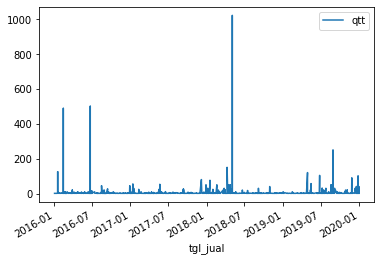

In [13]:
# visualisasi data 
dtg_viz=dtg.plot()

### Pencuplikan Ulang Data
<p>
    Agar observasi lebih jelas, data dicuplik ulang/resampling menjadi data bulanan dengan nilai rata-rata
</p>

In [14]:
# resampling ke data bulanan deng menjumlahkan rata-rata
dtg_b=dtg.resample('M').mean()

<AxesSubplot:xlabel='tgl_jual'>

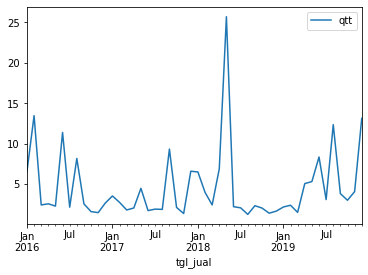

In [15]:
dtg_b.plot()

### 4. Analytical Approach: Model Selection and Metric Analysis

#### Dekomposisi Data
<p>
    Selanjutnya visualisasi pada gambar di atas di dekomposisi untuk menemukan trend, seasonal dan residu yang bermanfaat untuk menemukan parameter-parameter yang akan digunakan pada model yang akan digunakan. 
</p>

#### Dekomposisi Model Additive

In [16]:
# Dekompose
from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:
seas_add=seasonal_decompose(dtg_b, model='additive')

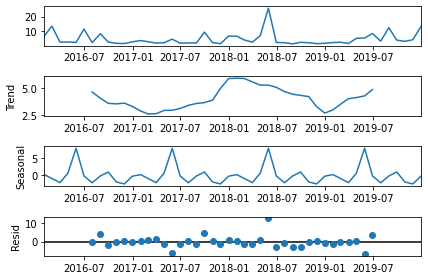

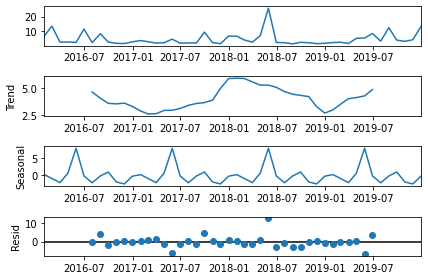

In [18]:
seas_add.plot()

#### Dekomposisi Model Multiplicative

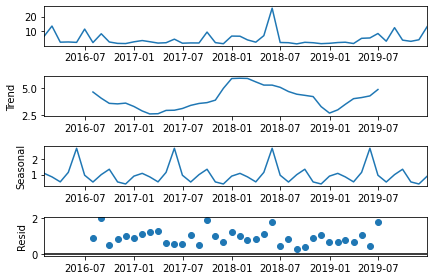

In [19]:
seas_mul=seasonal_decompose(dtg_b, model='multiplicative').plot()

#### Plotting Autocorrelation dan Partial Autocorrelation
<p>
    Plotting autocorrelation ini bermanfaat untuk mencari jumlah lag (p) sebagai salah satu parameter yang diperlukan.
</p>

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

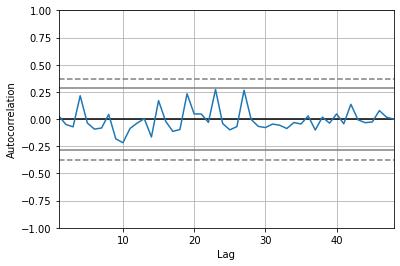

In [20]:
# plot autocorelasi 
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(dtg_b)

In [21]:
# dari ploting autocorrelation di atas, maka nilai p berada di sekitar 3 p=3, 
# nilai diff dapat dilihat dari trend line yang lebih mengarah ke polinomial d=2
# q untuk banyaknya windows untuk MA q=1

In [22]:
# lihat partial autocorrelation
from statsmodels.graphics.tsaplots import plot_pacf

/home/alif/Videos/venv/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


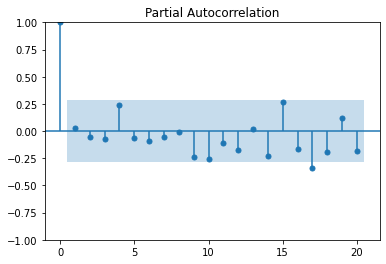

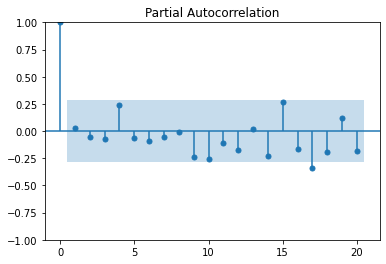

In [23]:
plot_pacf(dtg_b,lags=20)

####  Pemrosesan Data dengan Model ARIMA

<p>
    Pemrosesan data dengan model ARIMA dengan parameter p, d dan q yang sudah didapatkan dari proses seblumnya (dekomposisi dan autocorrelation) yang hasilnya dapat dilihat pada ringkasan berikut:
</p>

In [24]:
from statsmodels.tsa.arima.model import ARIMA

In [25]:
model=ARIMA((dtg_b),order=(4,2,1))

In [26]:
fit_model=model.fit()

In [27]:
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    qtt   No. Observations:                   48
Model:                 ARIMA(4, 2, 1)   Log Likelihood                -140.269
Date:                Tue, 05 Oct 2021   AIC                            292.537
Time:                        21:52:51   BIC                            303.509
Sample:                    01-31-2016   HQIC                           296.647
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7478      0.221     -3.382      0.001      -1.181      -0.314
ar.L2         -0.5953      0.287     -2.076      0.038      -1.157      -0.033
ar.L3         -0.4973      0.319     -1.558      0.119      -1.123       0.128
ar.L4         -0.0747      0.440     -0.170      0.865      -0.937       0.788
ma.L1         -0.9997     26.338     -0.038      0.970     -52.622      50.622
sigma2        22.3835    584.699      0.038      0.969   -1123.606    1168.373
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                49.32
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                             1.13
Prob(H) (two-sided):                  0.89   Kurtosis:                         7.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Plotting Data Residu

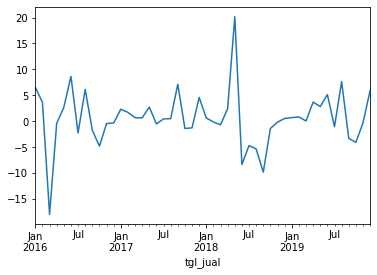

In [28]:
#plot residu
residu=fit_model.resid.plot()

#### Prediksi Data
<p>
    Berikut adalah prediksi penjualan dengan menggunakan ARIMA untuk 5 periode berikutnya.
</p>

In [29]:
hasil_pred=fit_model.forecast(5)
hasil_pred

2020-01-31    6.795784
2020-02-29    5.699577
2020-03-31    5.735801
2020-04-30    8.868138
2020-05-31    7.552407
Freq: M, Name: predicted_mean, dtype: float64

#### Plotting Data Bulanan VS Data Prediksi

In [30]:
yh=fit_model.predict()
yh.head()

tgl_jual
2016-01-31     0.000000
2016-02-29     9.812447
2016-03-31    20.388189
2016-04-30     2.958087
2016-05-31    -0.408997
Freq: M, Name: predicted_mean, dtype: float64

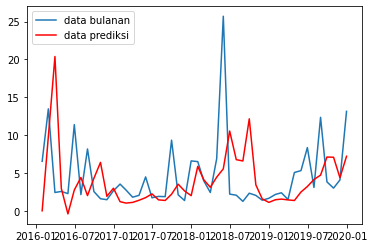

In [31]:
plt.plot(dtg_b, label='data bulanan')
plt.plot(yh,label='data prediksi',color='red')
plt.legend(loc='upper left')
plt.show()

### Validasi dan Evaluasi Model

<p>
    Validasi data pada analisis ini dilakukan menggunakan model walk forward, sedangkan untuk evaluasi model menggunakan RMSE. Sebelumnya data displit menjadi data latih dan data uji dengan proporsi 80:20.
</p>



#### Split data Latih dan data Uji

In [32]:
uk_train=int(dtg_b.shape[0]*0.8)
X=dtg_b.values
train, test =X[0:uk_train],X[uk_train:]

Data Latih: 5 Data Latih Awal

In [33]:
train[0:5]

array([[ 6.54166667],
       [13.46511628],
       [ 2.42105263],
       [ 2.5625    ],
       [ 2.27659574]])

Data Uji: 5 Data Uji Awal

In [34]:
test[0:5]

array([[1.5       ],
       [5.0625    ],
       [5.31034483],
       [8.35294118],
       [3.08695652]])

#### Plotting Hasil Prediksi dan Hasil Evaluasi
<p>
    Berikut ini adalah plotting hasil prediksi menggunakan data uji dan hasil evaluasi model dengan RMSE
</p>

prediksi=1.492578, observasi=1.500000
prediksi=1.421487, observasi=5.062500
prediksi=2.710669, observasi=5.310345
prediksi=3.408548, observasi=8.352941
prediksi=4.710301, observasi=3.086957
prediksi=4.890790, observasi=12.352941
prediksi=7.400910, observasi=3.821429
prediksi=7.350162, observasi=3.000000
prediksi=4.280168, observasi=4.073171
prediksi=7.006092, observasi=13.139535
Test RMSE: 4.149


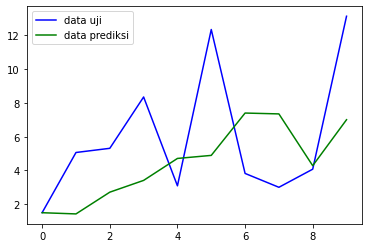

In [35]:
# Validasi dengan model walk forward arima
# Evaluasi dengan RMSE

log= [x for x in train]
lst_prediksi = list()

for t in range(len(test)):
	model = ARIMA(log, order=(3,2,1))
	fit_model = model.fit()
	hasil = fit_model.forecast()
	yh = hasil[0]
	lst_prediksi.append(yh)
	obs = test[t]
	log.append(obs)
	print('prediksi=%f, observasi=%f' % (yh, obs))
    
# evaluasi forcast
rmse = sqrt(mean_squared_error(test, lst_prediksi))
print('Test RMSE: %.3f' % rmse)

# plot forecasts vs prediksi hasil ev
plt.plot(test, label="data uji",color='blue')
plt.plot(lst_prediksi, label='data prediksi',color='green')
plt.legend(loc='upper left')
plt.show()